In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

mpl.rcParams['axes.unicode_minus'] = False

In [29]:
train = pd.read_csv("train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [30]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [31]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'day'), Text(0.5, 1.0, 'Rental volume by day')]

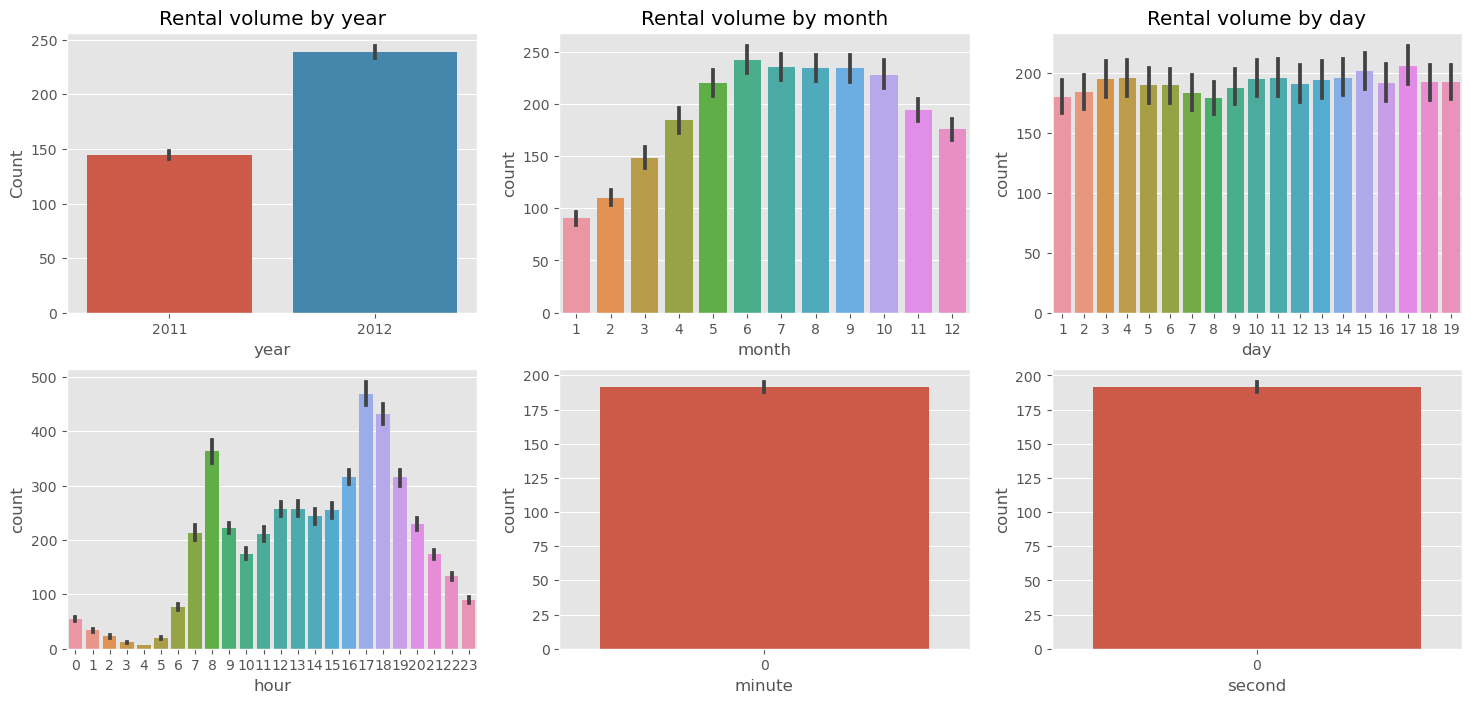

In [32]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="Rental volume by year")
ax2.set(xlabel='month',title="Rental volume by month")
ax3.set(xlabel='day', title="Rental volume by day")

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Rental Count by Working Day')]

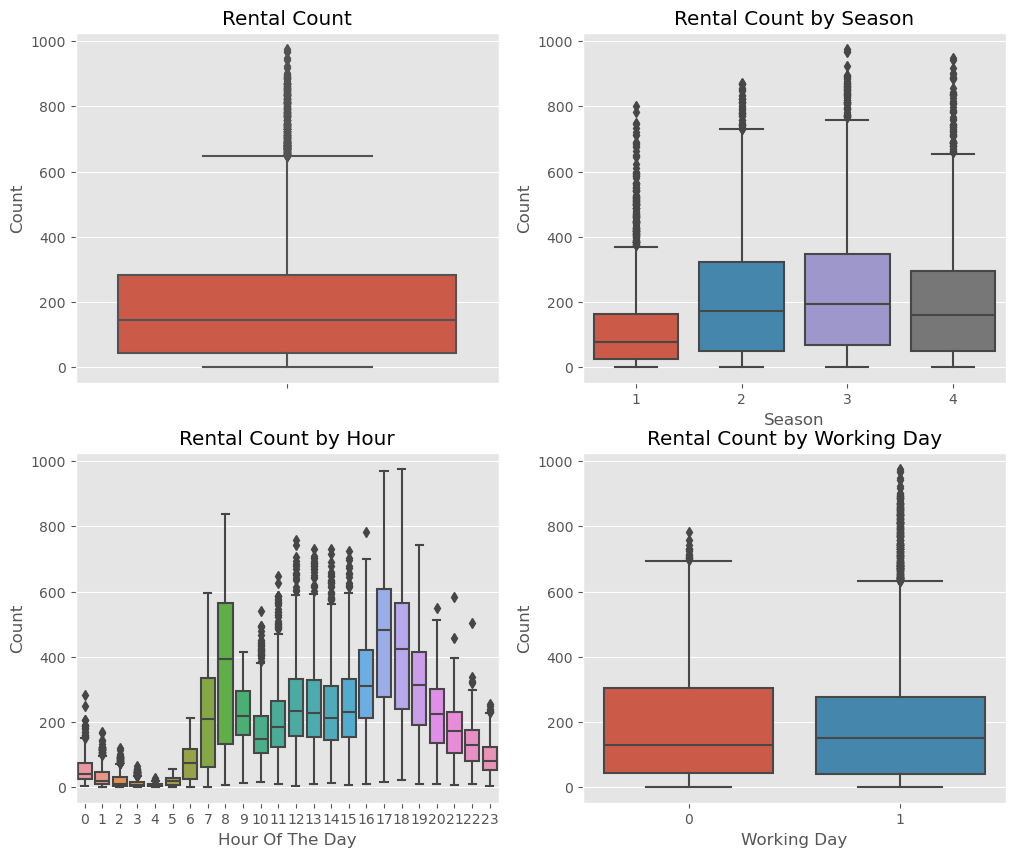

In [33]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=train,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=train,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count', title="Rental Count")
axes[0][1].set(xlabel='Season', ylabel='Count', title="Rental Count by Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title="Rental Count by Hour")
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Rental Count by Working Day")

Text(0.5, 1.0, 'Temperature vs Rental Count')

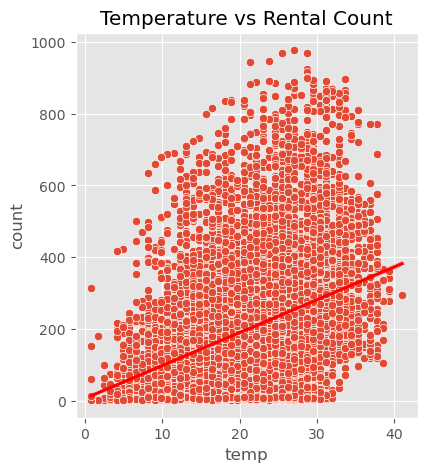

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=train, x='temp', y='count')
sns.regplot(data=train, x='temp', y='count', scatter=False, color='red')
plt.title('Temperature vs Rental Count')

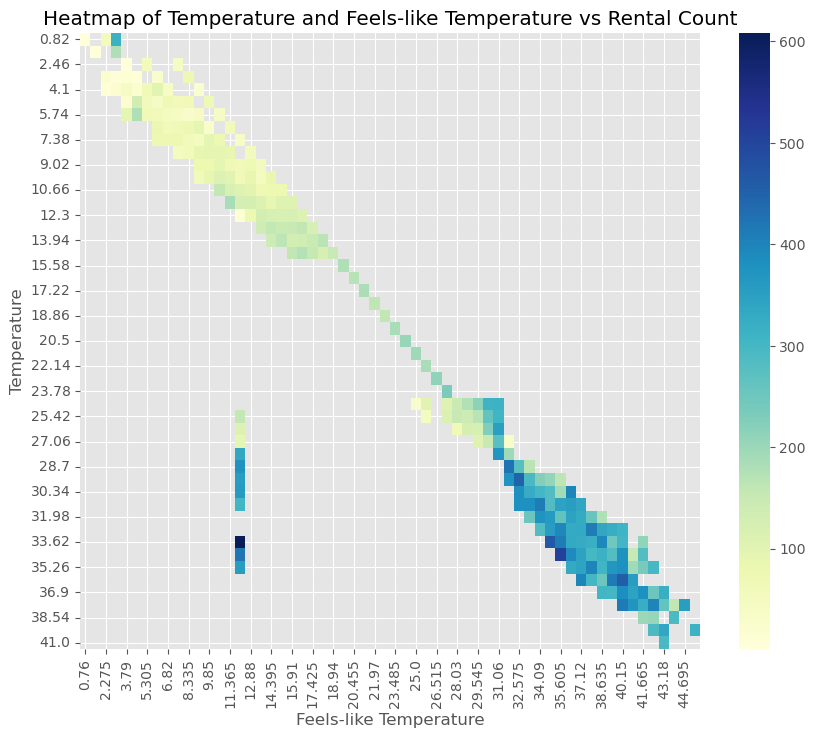

In [35]:
# 온도와 체감온도의 평균을 이용한 히트맵
temp_atemp_mean = train.groupby(['temp', 'atemp'])['count'].mean().unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(temp_atemp_mean, cmap="YlGnBu")
plt.title('Heatmap of Temperature and Feels-like Temperature vs Rental Count')
plt.xlabel('Feels-like Temperature')
plt.ylabel('Temperature')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


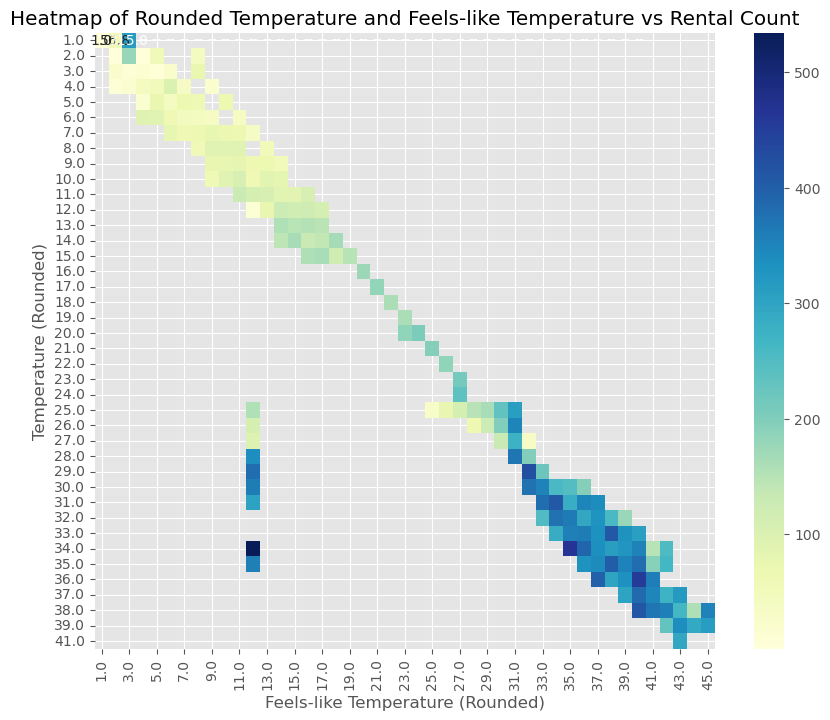

In [36]:
# 온도와 체감온도 반올림
train['temp_rounded'] = train['temp'].round()
train['atemp_rounded'] = train['atemp'].round()

# 반올림된 온도와 체감온도의 평균 대여량 계산
temp_atemp_mean = train.groupby(['temp_rounded', 'atemp_rounded'])['count'].mean().unstack()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(temp_atemp_mean, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Heatmap of Rounded Temperature and Feels-like Temperature vs Rental Count')
plt.xlabel('Feels-like Temperature (Rounded)')
plt.ylabel('Temperature (Rounded)')
plt.show()

/tmp/ipykernel_51372/655164224.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed_count_mean = train.groupby('windspeed_interval')['count'].mean()


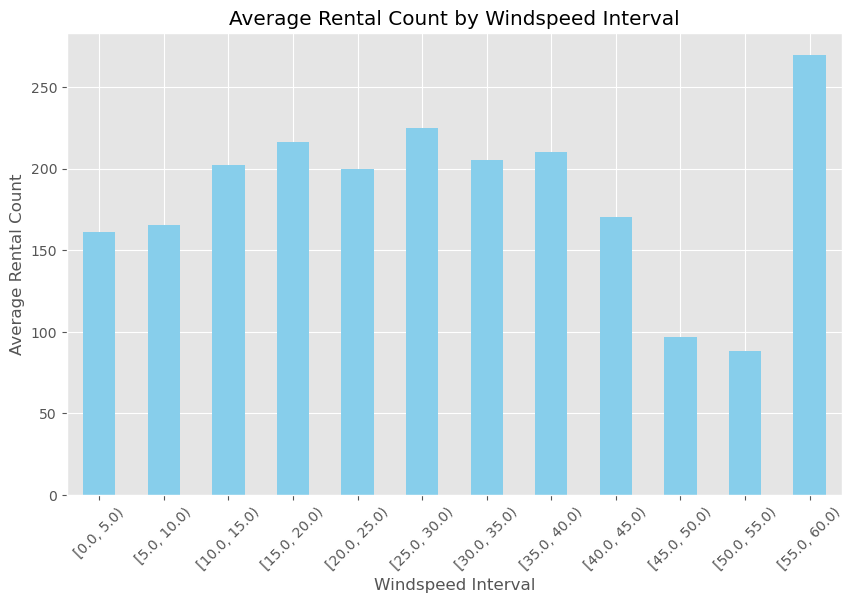

In [37]:
# 풍속을 구간별로 나누기
train['windspeed_interval'] = pd.cut(train['windspeed'], bins=np.arange(0, train['windspeed'].max() + 5, 5), right=False)

# 각 구간별 대여량의 평균 계산
windspeed_count_mean = train.groupby('windspeed_interval')['count'].mean()

# 바 그래프로 시각화
plt.figure(figsize=(10, 6))
windspeed_count_mean.plot(kind='bar', color='skyblue')
plt.title('Average Rental Count by Windspeed Interval')
plt.xlabel('Windspeed Interval')
plt.ylabel('Average Rental Count')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_51372/2306439804.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  windspeed_count_mean = train.groupby('windspeed_interval')['count'].mean()


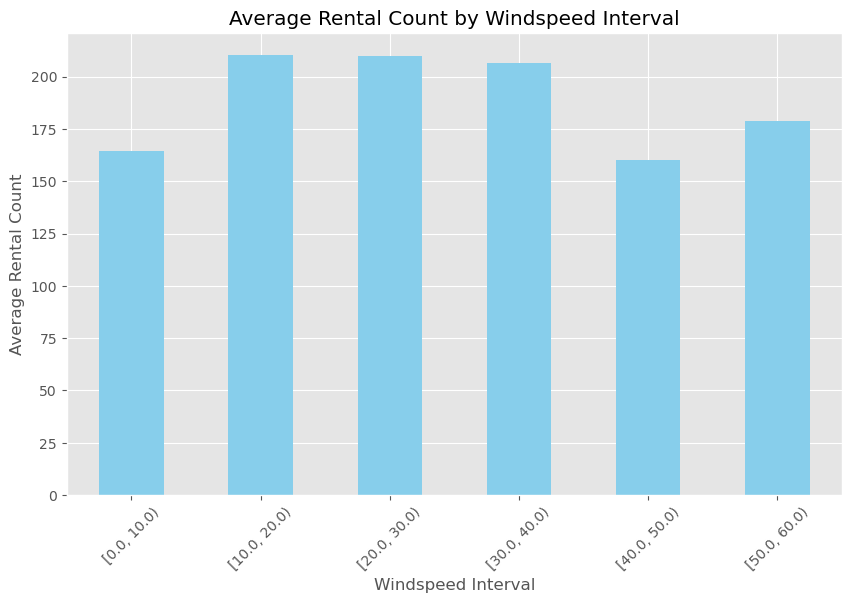

In [38]:
# 풍속을 구간별로 나누기
train['windspeed_interval'] = pd.cut(train['windspeed'], bins=np.arange(0, train['windspeed'].max() + 5, 10), right=False)

# 각 구간별 대여량의 평균 계산
windspeed_count_mean = train.groupby('windspeed_interval')['count'].mean()

# 바 그래프로 시각화
plt.figure(figsize=(10, 6))
windspeed_count_mean.plot(kind='bar', color='skyblue')
plt.title('Average Rental Count by Windspeed Interval')
plt.xlabel('Windspeed Interval')
plt.ylabel('Average Rental Count')
plt.xticks(rotation=45)
plt.show()

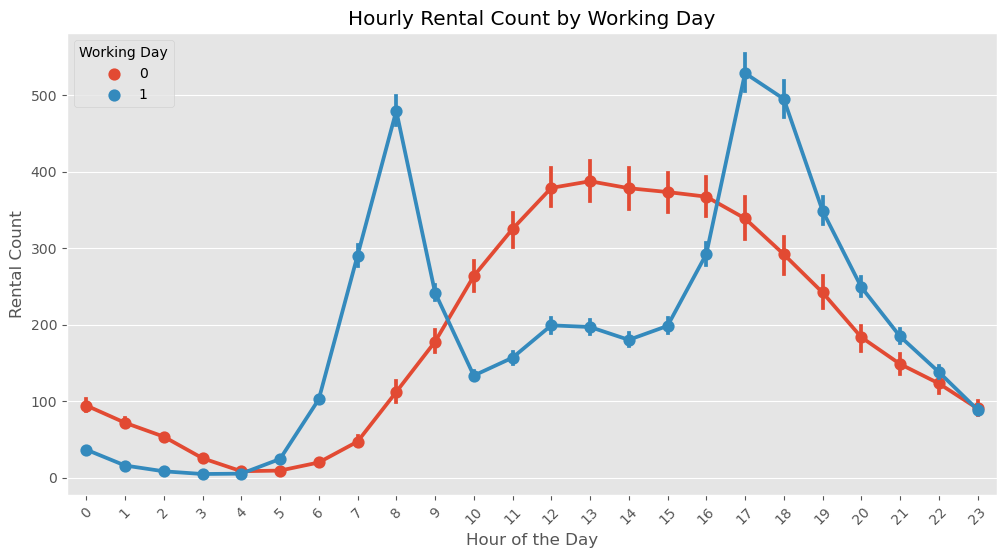

In [39]:
# 시간대별 대여량 그래프
plt.figure(figsize=(12, 6))
sns.pointplot(data=train, x='hour', y='count', hue='workingday')
plt.title('Hourly Rental Count by Working Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Rental Count')
plt.legend(title='Working Day', loc='upper left')
plt.xticks(rotation=45)
plt.show()